![title](birds-nest-4-eggs.png)

###### image:https://www.publicdomainpictures.net/nl/view-image.php?image=61631&picture=vogels-nest-4-eieren

#   The effect of precipitation between March and July on the breeding of birds in the Netherlands 1990-2020 in changes compared to the year before.

Sources:

Dutch bird breeding per season as percentage compared to indexyear (all years and all birds manually selected):
https://opendata.cbs.nl/statline/#/CBS/nl/dataset/84498NED/table?ts=1673294982549

Monthly sum of precipitation in 0.1 mm (ROYAL NETHERLANDS METEOROLOGICAL INSTITUTE):
###### De Kooy: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_235_rh24.txt
###### De Bilt: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_260_rh24.txt
###### Leeuwarden: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_270_rh24.txt
###### Eelde: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_280_rh24.txt
###### Twenthe: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_290_rh24.txt
###### Schiphol: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_240_rh24.txt
###### Rotterdam: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_344_rh24.txt
###### Vlissingen: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_310_rh24.txt
###### Eindhoven: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_370_rh24.txt
###### Maastricht/Beek: https://cdn.knmi.nl/knmi/map/page/klimatologie/gegevens/maandgegevens/mndgeg_380_rh24.txt

Additional info:
###### *Coordinates for the stations: http://climexp.knmi.nl/KNMIData/list_dx.txt
###### *geojson for provinces: https://www.webuildinternet.com/articles/2015-07-19-geojson-data-of-the-netherlands/provinces.geojson






In [19]:
#Importing all necessary libraries
import pandas as pd
import functions_final_assignment as fn
import numpy as np

#Loading in the files with a yaml config file
config = fn.yaml_config()

#Loading the data into a dataframe
precipitation_df = fn.load_concat_df(config["precipitation"])

birds_df = pd.read_excel(io=config["breedingbirds"],
           sheet_name="Provinciale trends 1990-2020",skiprows=2)

#loading a dataframe with the centerpoints of the provinces
geo_df = fn.read_geojson("DATA/provinces.geojson")

## Weather Data preparation

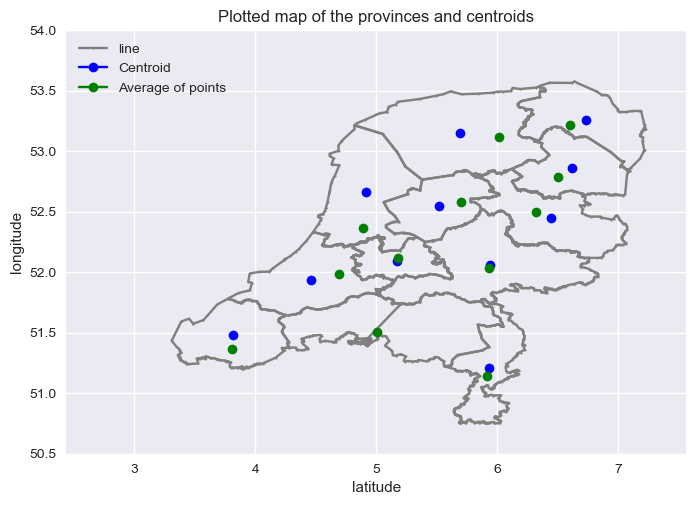

In [20]:

#getting the middle points of the provinces.
geo_df["middle_point"] = [fn.get_centerpoint(data)
                         for data
                         in geo_df["geometry.coordinates"]]

geo_df = geo_df[["properties.name","middle_point"]]


Every centroid except for that of Noord-brabant is calculated correctly,
this could be due to some encapsulated regions. 

In [21]:
#took the geographic mid point for brabant from google maps (its a monument)

geo_df["middle_point"].loc[6] = [51.562212646388495, 5.185266108595458]
geo_df.head(7)

,properties.name,middle_point
0,Drenthe,"[52.8622071324958, 6.619461381705508]"
1,Flevoland,"[52.55031170239515, 5.5136306312617895]"
2,Friesland (Fryslân),"[53.15279981753329, 5.691331306592688]"
3,Gelderland,"[52.06168764886897, 5.939038403735298]"
4,Groningen,"[53.26077566904552, 6.730170242648407]"
5,Limburg,"[51.2093722236704, 5.933294457008504]"
6,Noord-Brabant,"[51.562212646388495, 5.185266108595458]"


The precipitation data starts well before 1990, as we only need the data between 1990 and 2020 we can get rid of most data.
After that the amount of missing values may be calculated.

In [22]:
#select only the rows with the values in the YYYY column between 1990 and 2020
precipitation_df = precipitation_df[precipitation_df.YYYY.between(1990,2020)]
#Show the unique values for YYYY to see if the YYYY filtering is done correctly
print(f'{precipitation_df.YYYY.unique()}')


[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [23]:
#Calculated the amount of missing values
print(f'The amount of missing values are:\n {precipitation_df.isnull().sum()}')


The amount of missing values are:
 STN       0
YYYY      0
   JAN    0
   FEB    0
   MAR    0
   APR    0
   MAY    0
   JUN    0
   JUL    0
   AUG    0
   SEP    0
   OCT    0
   NOV    0
   DEC    0
  YEAR    0
dtype: int64


In [24]:
#convert all values to integers:
precipitation_df = precipitation_df.astype(int)

#Adding the location at which the station is found to the dataframe
stn_dict = fn.make_stn_dict(config["stn_coord"])
precipitation_df["COORD"] = [stn_dict[str(s)] for s in precipitation_df.STN]
precipitation_df.head()

,STN,YYYY,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEAR,COORD
39,240,1990,463,1136,203,417,193,824,295,741,1157,601,1082,465,7577,"[52.32, 4.78]"
40,240,1991,459,282,230,383,280,1134,563,295,834,462,1268,506,6696,"[52.32, 4.78]"
41,240,1992,463,301,788,386,388,562,641,1357,579,1253,1228,614,8560,"[52.32, 4.78]"
42,240,1993,850,258,84,397,712,533,1617,669,1414,765,638,1478,9415,"[52.32, 4.78]"
43,240,1994,863,256,998,791,430,453,407,828,1472,1361,420,1256,9535,"[52.32, 4.78]"


In [25]:
#As we want to see the sum for precipitation between march and july
#A column will be added
precipitation_df["MAR-JUL"] = precipitation_df.iloc[:,4:9].T.sum()
precipitation_df = precipitation_df[["STN","YYYY","COORD","MAR-JUL"]]
precipitation_df.head()

,STN,YYYY,COORD,MAR-JUL
39,240,1990,"[52.32, 4.78]",1932
40,240,1991,"[52.32, 4.78]",2590
41,240,1992,"[52.32, 4.78]",2765
42,240,1993,"[52.32, 4.78]",3343
43,240,1994,"[52.32, 4.78]",3079


The skew of the data: 0.343
mu (robust) = 2865.0, sigma (robust) = 663.27


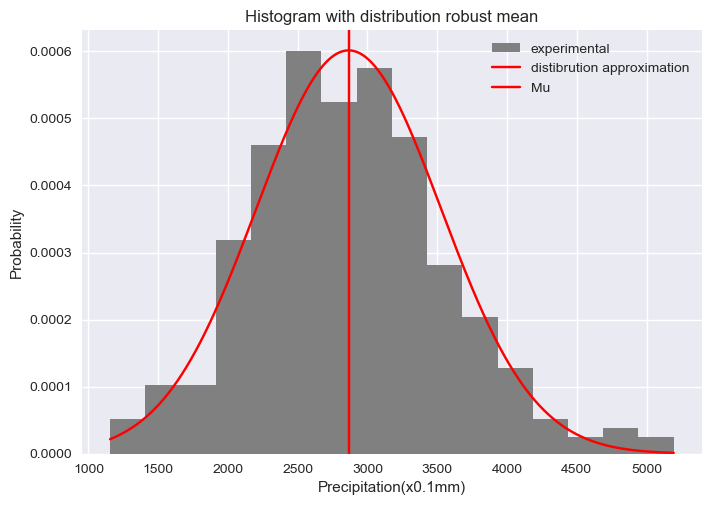

In [26]:
from scipy.stats import skew
#plot to see if the rain in March and July is normally distributed
#Also to see what the mean and deviation is. 

prec_skew = skew(precipitation_df["MAR-JUL"]) # third moment

print(f'The skew of the data: {prec_skew:.3f}')

fn.hist_robust_dist(precipitation_df["MAR-JUL"])




There is some right skewedness but not severe <0.5, thus the data is quite symmetrical
The data looks distributed normally, with a Q-Q plot we can check this. 

Estimation method: robust
n = 310, mu = 2817, sigma = 663.3
Expected number of data outside CI: 16


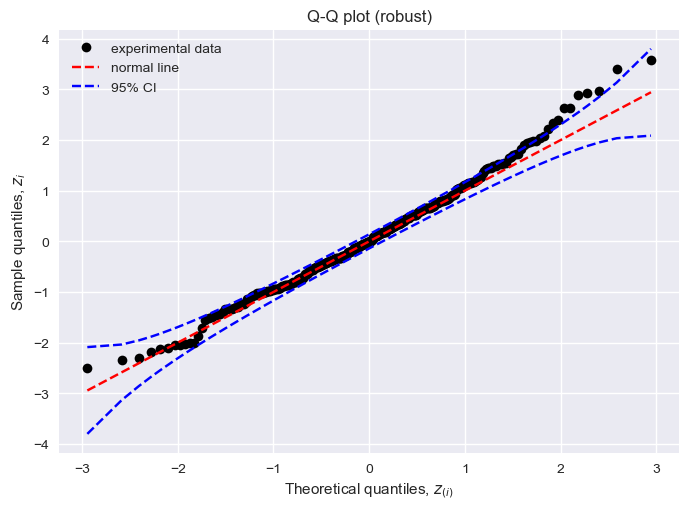

In [27]:
fn.DS_Q_Q_Plot(precipitation_df["MAR-JUL"])


The amount of data outside of the 95% CI is below but close to the expected number


In [28]:
stn_df = precipitation_df[["STN","COORD"]] # take the stn and coordinate columns
stn_df = stn_df.drop_duplicates(subset=["STN"])

#calculate the distance from the middle of the provinces to the stations
for c, column in enumerate(geo_df["properties.name"]):
    stn_df[column] = [fn.calc_point_dist(geo_df.iloc[c,1],x) 
                                for x  
                                in stn_df["COORD"]]

#------Giving weight to the stations for different provinces:
# Calculates the distance (sum of coordinates) between the weatherstations
#  and the middle point of the province.
# Now the ratios will be calculated (province/sum) and the distances will be
#overwritten.
for column in stn_df.columns[2:]:
    #first the sum of the distances is calculated for a province
    col_sum = stn_df[column].sum()
    #The squared inverse is calculated 1/(distance to a station/sum of the distances) 
    stn_df[column] = [ (1/(i/col_sum)) for i in stn_df[column]]
    #now the new sum is calculated
    col_sum = stn_df[column].sum()
    # now the final ratios/weights are calculated
    stn_df[column] = [ (i/col_sum) for i in stn_df[column]]

stn_df.head(12)

,STN,COORD,Drenthe,Flevoland,Friesland (Fryslân),Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland
39,240,"[52.32, 4.78]",0.052948,0.129702,0.045724,0.096920,0.046875,0.067878,0.091500,0.212266,0.069970,0.015140,0.077872,0.052709
89,260,"[52.1, 5.18]",0.062339,0.177954,0.048229,0.151434,0.052409,0.093170,0.146204,0.125463,0.089146,0.935486,0.066490,0.035560
84,235,"[52.93, 4.78]",0.055163,0.120732,0.060168,0.079470,0.051312,0.052468,0.055119,0.262564,0.067351,0.007434,0.057209,0.025142
39,270,"[53.22, 5.75]",0.107996,0.140432,0.632775,0.098063,0.103460,0.053830,0.044897,0.077848,0.112203,0.005427,0.038311,0.014406
84,280,"[53.12, 6.58]",0.389340,0.082491,0.063476,0.093019,0.493090,0.053879,0.037606,0.045267,0.169111,0.003939,0.031019,0.010792
39,290,"[52.27, 6.88]",0.156941,0.071501,0.038124,0.119420,0.101290,0.076445,0.042813,0.039001,0.247171,0.003995,0.031510,0.010724
84,310,"[51.45, 3.6]",0.030461,0.045181,0.020931,0.047603,0.028067,0.046332,0.049477,0.043746,0.038727,0.004028,0.460807,0.026419
33,344,"[51.97, 4.45]",0.043286,0.082312,0.032922,0.077146,0.038737,0.065197,0.093521,0.093785,0.056947,0.009329,0.124127,0.783416
39,370,"[51.45, 5.38]",0.054039,0.089979,0.032609,0.138886,0.044935,0.180127,0.349856,0.060163,0.080148,0.010097,0.063725,0.025164
84,380,"[50.9, 5.77]",0.047488,0.059716,0.025042,0.098039,0.039825,0.310673,0.089006,0.039897,0.069227,0.005125,0.048931,0.015669


In [29]:
precipitation_df = precipitation_df.set_index(['YYYY','STN']).sort_index()

precipitation_df = precipitation_df.drop(columns="COORD")

for i in stn_df.columns[2:]:
    precipitation_df[i] = [precipitation_df["MAR-JUL"].iloc[c]
                           *
                           stn_df[i].iloc[fn.get_position(c)]
                           for 
                           c, year in enumerate(precipitation_df.index)]

precipitation_df = precipitation_df.reset_index()
precipitation_df = precipitation_df.drop(columns=["STN","MAR-JUL"])

years = precipitation_df.YYYY.unique()

def get_sum_precipitation():
    dict_sum = {"Years":years}
    for province in precipitation_df.columns[1:]:
        sums = []
        for year in years:
            sums.append(sum(precipitation_df[province][precipitation_df["YYYY"] == year]))
        dict_sum.update({province:sums})
    return dict_sum

province_prec_df = pd.DataFrame(get_sum_precipitation())

#Sorry Fenna:
province_prec_df = province_prec_df.rename(columns={"Friesland (Fryslân)":"Friesland"})

province_prec_df.head()

,Years,Drenthe,Flevoland,Friesland,Gelderland,Groningen,Limburg,Noord-Brabant,Noord-Holland,Overijssel,Utrecht,Zeeland,Zuid-Holland
0,1990,2245.164910,2099.523728,2394.680013,2086.561883,2254.635898,1991.400295,1955.694373,2053.355119,2205.437705,1938.773925,1957.333227,2051.516097
1,1991,2682.230706,2590.458033,2594.693623,2526.941515,2773.060333,2508.598116,2415.570357,2640.556192,2506.665215,2588.551107,2671.919560,3087.370393
2,1992,2969.705042,2943.408914,3091.280412,2934.400867,3000.574735,3002.883984,2919.731348,2934.160840,2913.294420,2776.422368,3119.612904,3110.019303
3,1993,2955.700366,2812.692485,2352.531898,2852.451091,2926.472965,2682.419778,2760.026285,2835.521601,2991.847504,3298.744367,2759.193675,2874.717552
4,1994,3560.975936,3149.479791,3474.518583,3127.167633,3637.238239,2851.241452,2930.323544,3098.064176,3365.868670,3071.070103,2778.076725,2701.750875


In [30]:
import matplotlib.pyplot as plt
import ipywidgets as pw

prec_province_df = province_prec_df.copy()

def plot(Province):
    plt.bar(x=prec_province_df.Years,height=prec_province_df[Province])
    plt.xlabel("Years");plt.ylabel("Precipitation (in 0.1mm)")
    plt.title(f'Precipitation in {Province}');plt.xticks(years,rotation=90)

prec_province = pw.interactive(plot,Province=prec_province_df.columns[1:])

prec_province

interactive(children=(Dropdown(description='Province', options=('Drenthe', 'Flevoland', 'Friesland', 'Gelderla…

As seen in the interactive plots, 1996 is an exceptionally dry year. 2007 in contrast looks way wetter than average. 

## Birds Dataframe preparation

In [31]:
#and now prepare the data in the birds df:

birds_df.head()

,nr.,Soort,Wetenschappelijke naam,English name,Provincie,1990,1991,1992,1993,1994,...,2015,2016,2017,2018,2019,2020,Trend 1990-2020,Percentage jaarlijkse verandering vanaf 1990,Trend 2009-2020,Percentage jaarlijkse verandering vanaf 2009
0,1,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Drenthe,0.00,1.23,10.53,16.70,17.52,...,93.38,100.43,99.68,97.36,88.31,100.0,sterke toename (++),12.825678,matige toename (+),4.285238
1,2,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Friesland,0.00,0.00,0.75,0.44,0.88,...,74.90,64.16,53.41,57.92,65.94,100.0,sterke toename (++),20.507127,matige toename (+),4.495473
2,3,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Gelderland,1.14,1.16,1.83,2.31,2.51,...,109.62,131.93,124.18,118.74,110.66,100.0,sterke toename (++),17.690644,matige toename (+),7.092411
3,4,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Groningen,1.12,0.97,1.27,1.42,2.23,...,108.18,99.20,76.87,108.10,120.74,100.0,sterke toename (++),16.975959,matige toename (+),6.507661
4,5,Grote Canadese gans,Branta canadensis canadensis,Greater Canada Goose,Limburg,0.00,0.00,0.00,0.00,0.33,...,58.92,77.85,79.85,94.13,107.41,100.0,sterke toename (++),24.159061,matige toename (+),4.280005


Some descriptives in the first three and in the last four columns we do not need. 

In [32]:
#drop the first three and the last four columns
birds_df = birds_df.iloc[:,3:-4]

In [33]:
#change the values to delta precentage change
#replace the data with percentage change, with 1990 as 0. np.inf and -np.inf are converted to zero.
birds_df = birds_df.T
birds_df.iloc[2:,:] = birds_df.iloc[2:,:].pct_change().replace({np.inf:np.NaN,-np.inf:np.NaN})
birds_df = birds_df.T.rename(columns={"Provincie":"Province"})
birds_df = birds_df.rename(columns={x:int(x) for x in birds_df.columns[2:]})
birds_df = birds_df.set_index("English name")


In [34]:
birds_df = birds_df.reset_index().set_index(["English name","Province"])
birds_df = birds_df.T


#list with all birds we need
list_bird = [bird[0] for bird in birds_df.columns.unique()]
list_birds = list(set(list_bird))
#list with the provinces we need
list_provinces = [bird[1] for bird in birds_df.columns.unique()]
list_provinces = list(set(list_provinces))


#First create a dictionary 
values = [province_prec_df[i] for i in list_provinces]
values = [value for i in values for value in i]

dict_for_df = {"Precipitation":values}


for bird in list_birds:
    bird_values = []
    for province in list_provinces:
        try: 
            b_val = [value for value in birds_df[bird,province]]
            bird_values.append(b_val)
        except:
            n_val = [np.NaN for i in range(31)]
            bird_values.append(n_val)
    bird_values = [value for nested in bird_values for value in nested]
    dict_for_df.update({bird:bird_values})

filtered_df = pd.DataFrame(dict_for_df)

# Some birds are very region specific, so we keep only the most common birds
filtered_df = filtered_df.dropna(axis=1,thresh=300)


def bird_scatter_plot(bird):
    x = filtered_df["Precipitation"]
    y = filtered_df[bird]
    plt.scatter(x=x ,y=y)
    reg = pd.DataFrame({"Precipitation":x,bird:y})
    reg = reg.dropna()
    coef = np.polyfit(reg["Precipitation"],reg[bird],1)
    x_list = np.linspace(1000,5000,1001)
    f_reg = np.poly1d(coef)
    plt.plot(x_list, f_reg(x_list), 'k--')
    plt.ylabel("delta percentage");plt.xlabel("Precipitation (in 0.1mm)")
    plt.title(f'Effect precipitation on {bird}')

bird_scatter = pw.interactive(bird_scatter_plot,bird=filtered_df.columns[1:])

bird_scatter

interactive(children=(Dropdown(description='bird', options=('Eurasian Blue Tit', 'Eurasian Reed Warbler', 'Egy…

The Eurasian Wren and the Grey Heron seem most effected by precipitation. 
Overall no strong relationship is seen between birds and precipitation. 

There are some values for the Common Tern that are really high.
An explanation for this could be due to indexing instead of actual counts.
If there are only a few breeding Common Terns counted in a province an increase with
only a few will look like a drastic percentage increase. 


In [35]:
# the overall effect of precipitation on birds

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# as these extreme values will mess up the assesment of the overall effect
# the Common Tern column is dropped.
filtered_df = filtered_df.drop(columns="Common Tern")

#create a dataframe with means. 

means_df,std_df = fn.make_prec_corr(filtered_df)


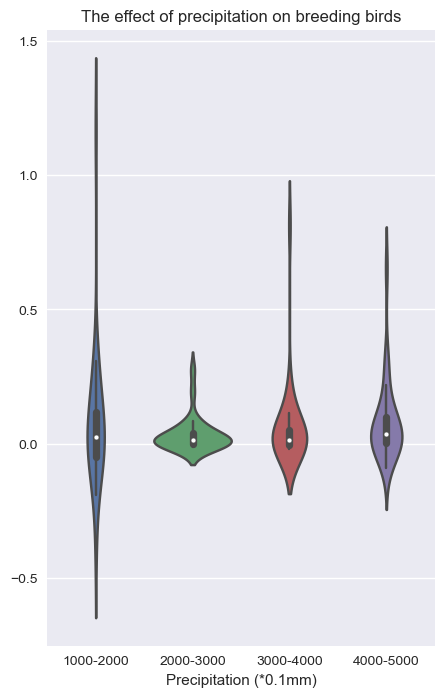

In [36]:


f, ax = plt.subplots(figsize=(5, 8))

#Generate a custom diverging colormap
sns.violinplot(data=means_df)

# Draw the heatmap with the mask and correct aspect ratio
ax.set_xlabel("Precipitation (*0.1mm)")
ax.set_title("The effect of precipitation on breeding birds")
plt.show()

The overall plot is in the positive, indicating that breeding birds have increased
over the last couple of years. There is no difference seen between the groups (based on the error and ).

The first pecipitation category 1000-2000 is represented
as a sharp violin with high min and maximum values. The density/ frequency of the data however
is much lower, this could be due to . 

It is interesting to see that precipitation between 2000-3000 is the most stable, this could be
explained by the most data falling within this group (less variance). 



## Conclusion:

While some birds especially the Eurasian wren and the grey heron, show some correlation with the amount of precipitation there is not enough evididence to support it. As only one extreme year (1996) accounts for the greatest part of the effect (100-200mm)

A real downside is the use of cumulative data instead of quantitative data for the birds. As some measurements with low quantities are maybe better explained by probability. 

